In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)

In [4]:
def average_participant_results(results, k_folds=3):
    
    acc = 0
    f_score = 0
    conf_mat = np.zeros((3,3), dtype="int")
    
    for i in range(k_folds):
        acc += results["cv{}_accuracy".format(i)]
        f_score += results["cv{}_f_score".format(i)]
       
        # dealing with different size confusion matrices / shouldn't be larger than 3,3
        cm = np.array(results["cv{}_conf_mat".format(i)], dtype="int")
        idx_y = conf_mat.shape[0] - cm.shape[0]
        idx_x = conf_mat.shape[1] - cm.shape[1]
        conf_mat[:-idx_y or None, :-idx_x or None] += cm
        
    return acc / k_folds, f_score / k_folds, conf_mat

In [5]:
def average_experiment_results(results, participants, k_folds=3):
    
    exp_acc = 0
    exp_f = 0
    exp_cm = np.zeros((3,3), dtype="int")
    
    for p in participants:
        acc, f_score, cm = average_participant_results(results[p], k_folds)
        exp_acc += acc
        exp_f += f_score
        
        diff_x = (exp_cm.shape[1] - cm.shape[1]) * -1
        diff_y = (exp_cm.shape[0] - cm.shape[0]) * -1
        exp_cm[:diff_y or None,:diff_x or None] += cm
        
    return exp_acc / len(participants), exp_f / len(participants), exp_cm

In [26]:
participants = ["p1", "p3", "p4", "p6"]
features = ["honv"]
cell_sizes = [(4,4), (6,6), (8,8), (12,12), (16,16)]
block_sizes = [(1,1), (2,2), (3,3), (4,4)]

i = 0
results_hog ={}
for f in features:
    for c in cell_sizes:
        for b in block_sizes:
            i+=1
            feature_type = "f_{}-c_{}-b_{}".format(f, c[0], b[0])
            results_hog[feature_type] = np.load("results/hog_size_results/cmj_exp2_results_{}.pkl".format(i))

In [27]:
acc, f, cm = average_experiment_results(results_hog['f_hog-c_16-b_3'], participants)

In [28]:
print(acc)
print(f)
print(cm)

0.920938889894
0.918793889734
[[17484   547   270]
 [  733  4411    16]
 [  335    30   730]]


In [9]:
participants = ["p1", "p3", "p4", "p6"]
features = ["honv"]
cell_sizes = [(6,6), (8,8), (12,12), (16,16)]
block_sizes = [(1,1), (2,2), (3,3), (4,4)]

i = 4
results_honv ={}
for f in features:
    for c in cell_sizes:
        for b in block_sizes:
            i+=1
            feature_type = "f_{}-c_{}-b_{}".format(f, c[0], b[0])
            results_honv[feature_type] = np.load("results/honv_size_results/cmj_exp3_results_{}.pkl".format(i))

In [10]:
participants = ["p1", "p3", "p4", "p6"]
features = ["honv"]
cell_sizes = [(6,6), (8,8), (12,12), (16,16)]

i = 0
results_honv_nb ={}
for f in features:
    for c in cell_sizes:
            i+=1
            feature_type = "f_{}-c_{}-b_{}".format(f, c[0], "none")
            results_honv[feature_type] = np.load("results/honv_noblock_results/cmj_exp4_results_{}.pkl".format(i))

In [11]:
exp1 = np.load("results/honv_size_results/cmj_exp3_results_1.pkl")
exp3 = np.load("results/honv_size_results/cmj_exp3_results_3.pkl")

In [12]:
acc, f, cm = average_experiment_results(exp1, participants)

In [13]:
print(acc)
print(f)
print(cm)

0.947956918407
0.945210827378
[[17829   297   175]
 [  470  4676    14]
 [  319    15   761]]


In [14]:
acc, f, cm = average_experiment_results(exp3, participants)

In [15]:
print(acc)
print(f)
print(cm)

0.947103229802
0.944300164375
[[17821   305   175]
 [  485  4661    14]
 [  315    15   765]]


In [16]:
acc, f, cm = average_experiment_results(results_honv["f_honv-c_8-b_3"], participants)

In [17]:
print(acc)
print(f)
print(cm)

0.947646903738
0.945319539234
[[17804   309   188]
 [  462  4693     5]
 [  316    15   764]]


In [29]:
accs, fs, cms = [], [], []

features = ["hog"]
block_sizes = [(1,1), (2,2), (3,3), (4,4)]

for f in features:
    for c in cell_sizes:
        for b in block_sizes:
            if b is not None:
                feature_type = "f_{}-c_{}-b_{}".format(f, c[0], b[0])
            else:
                feature_type = "f_{}-c_{}-b_{}".format(f, c[0], "none")
                
            if f is "hog":
                r = results_hog[feature_type]
            else:
                r = results_honv[feature_type]
                    
            exp_accs, exp_fs, exp_cms = [], [], []

            for p in participants:
                acc, f_score, cm = average_participant_results(r[p])

                exp_accs.append(acc)
                exp_fs.append(f_score)
                exp_cms.append(cm)

            accs.append(exp_accs)
            fs.append(exp_fs)
            cms.append(exp_cms)

accs = np.array(accs)
fs = np.array(fs)
cms = np.array(cms)

l = len(accs)

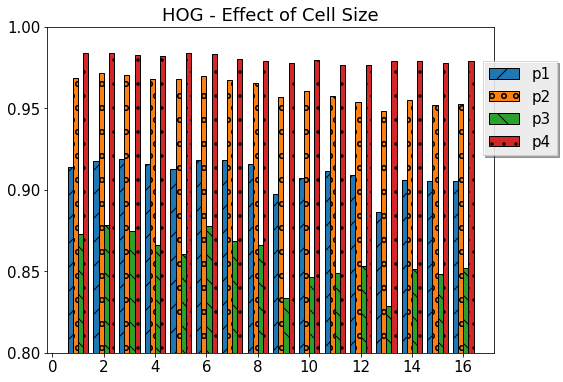

In [24]:
idx = np.arange(l) + 1
width = .2

plt.figure(figsize=(8,6))
plt.ylim([.85, 1.0])
plt.yticks(np.linspace(.8, 1.0, 5))
# plt.xticks(idx,["128x128", "90x160", "130x190", "96x96"])

plt.title("HOG - Effect of Cell Size")
plt.bar(idx-(width*1+width/2), accs[:,0], width, hatch="/", edgecolor='black')
plt.bar(idx-(width*0+width/2), accs[:,1], width, hatch="o", edgecolor='black')
plt.bar(idx+(width*1-width/2), accs[:,2], width, hatch="\\", edgecolor='black')
plt.bar(idx+(width*2-width/2), accs[:,3], width, hatch=".", edgecolor='black')
plt.legend(["p1", "p2", "p3", "p4"], loc='center left', bbox_to_anchor=(.96, 0.75), fancybox=False, shadow=True)

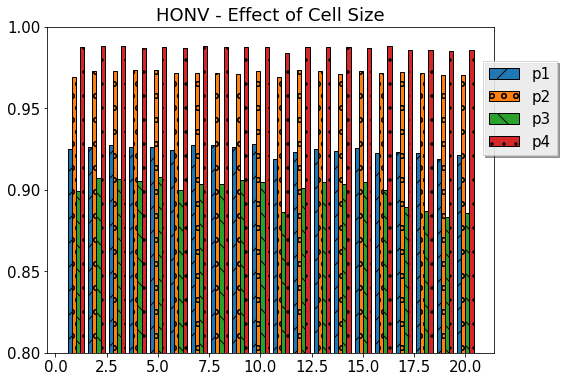

In [20]:
idx = np.arange(l) + 1
width = .2

plt.figure(figsize=(8,6))
plt.ylim([.85, 1.0])
plt.yticks(np.linspace(.8, 1.0, 5))
# plt.xticks(idx,["128x128", "90x160", "130x190", "96x96"])

plt.title("HONV - Effect of Cell Size")
plt.bar(idx-(width*1+width/2), accs[:,0], width, hatch="/", edgecolor='black')
plt.bar(idx-(width*0+width/2), accs[:,1], width, hatch="o", edgecolor='black')
plt.bar(idx+(width*1-width/2), accs[:,2], width, hatch="\\", edgecolor='black')
plt.bar(idx+(width*2-width/2), accs[:,3], width, hatch=".", edgecolor='black')
plt.legend(["p1", "p2", "p3", "p4"], loc='center left', bbox_to_anchor=(.96, 0.75), fancybox=False, shadow=True)

In [21]:
hog_p_avgs = np.average(accs, axis=0)

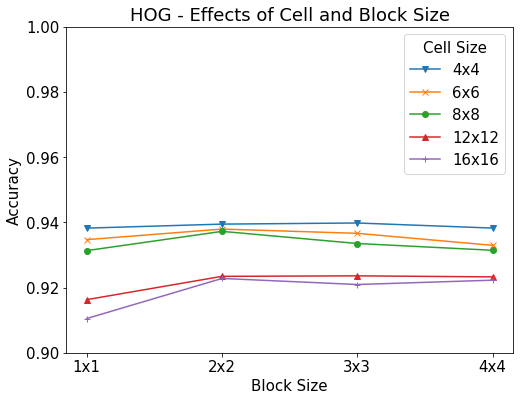

In [32]:
idx = np.arange(len(block_sizes))

plt.figure(figsize=(8,6))
plt.title("HOG - Effects of Cell and Block Size")
plt.xticks(idx,["1x1", "2x2", "3x3", "4x4"])
plt.xlabel("Block Size")

plt.ylim([.9, 1.0])
plt.ylabel("Accuracy")

legend=["4x4","6x6", "8x8", "12x12", "16x16"]
markers = ["v","x", "o", "^", "+"]

for i, (title, marker) in enumerate(zip(legend, markers)):
    plt.plot(np.average(accs[i*len(block_sizes):i*len(block_sizes) + len(block_sizes), :], axis=1), marker=marker, label=title, alpha=1)

plt.legend(title="Cell Size")
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/cmj-hog-blocksize.jpg")

In [109]:
np.average(accs, axis=1)

array([ 0.94510637,  0.94848446,  0.94856964,  0.94795733,  0.94873076,
        0.94579987,  0.94764399,  0.947496  ,  0.9476469 ,  0.94822034,
        0.93957969,  0.94631665,  0.94729952,  0.94646799,  0.94756565,
        0.94553046,  0.94266671,  0.94175029,  0.93938329,  0.94081312])

In [ ]:
accs

In [95]:
print(hog_p_avgs)
print(honv_p_avgs)

[ 0.91159964  0.96413045  0.86213249  0.98104629]
[ 0.92493458  0.97209589  0.90022399  0.9869987 ]
